## Importado de librerias

In [1]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
path_metal = '/Users/francobenko/Documents/DataSets/metalgrid.jpg'

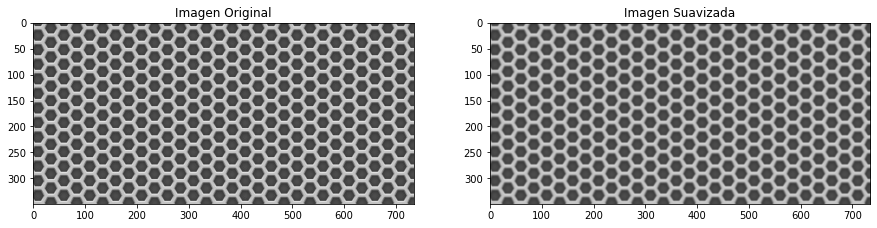

In [5]:
#Creado de imagenes
img = cv.imread(path_metal)

#Pasando a RGB
img_g = cv.cvtColor(img, cv.IMREAD_GRAYSCALE)

#Suavizado de la imagen
img_g_sua = cv.GaussianBlur(img,(5,5),0)


#Ploteando Imagen
plt.figure(figsize=(15,15))
ax1 = plt.subplot(121)
ax1.imshow(img_g)
ax1.set_title('Imagen Original')

ax2 = plt.subplot(122)
ax2.imshow(img_g_sua)
ax2.set_title('Imagen Suavizada')

plt.show()

## Gradiente por Sobel

In [8]:
# Gradientes

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_32 = cv.Sobel(img_g_sua,cv.CV_32F,1,0,ksize=5)
absx_32 = np.absolute(sobelx_32)
sobelx_8u1 = absx_32/absx_32.max()*255
#Recortado del rango de valores
np.clip(sobelx_8u1, 0, 255, out=sobelx_8u1)
#Convertimos a uint8
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_32 = cv.Sobel(img_g_sua,cv.CV_32F,0,1,ksize=5)
absy_32 = np.absolute(sobely_32)
sobely_8u1 = absy_32/absy_32.max()*255
#Recortado del rango de valores
np.clip(sobely_8u1, 0, 255, out=sobely_8u1)
#Convertimos a uint8
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
#Recortado del rango de valores
np.clip(mag, 0, 255, out=mag)
#Convertimos a uint8
mag = np.uint8(mag)

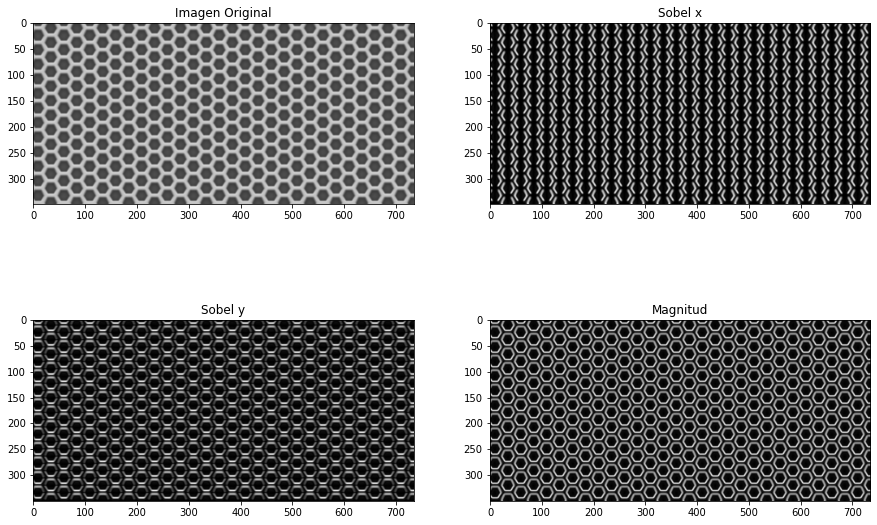

In [19]:
#Ploteado de imagenes
fig_i = plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
ax1.imshow(img_g_sua)
ax1.set_title('Imagen Original')

ax2 = plt.subplot(222)
ax2.imshow(sobelx_8u)
ax2.set_title('Sobel x')

ax3 = plt.subplot(223)
ax3.imshow(sobely_8u)
ax3.set_title('Sobel y')

ax4 = plt.subplot(224)
ax4.imshow(mag)
ax4.set_title('Magnitud')

plt.show()

## Gradiente por Scharr

In [15]:
# Gradientes

# Aplicamos Scharrx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
scharrx_32 = cv.Scharr(img_g_sua,cv.CV_32F,1,0)
absx_32 = np.absolute(scharrx_32)
scharrx_8u1 = absx_32/absx_32.max()*255
#Recortado del rango de valores
np.clip(scharrx_8u1, 0, 255, out=scharrx_8u1)
#Convertimos a uint8
scharrx_8u = np.uint8(scharrx_8u1)

# De igual modo para Scharry
scharry_32 = cv.Scharr(img_g_sua,cv.CV_32F,0,1)
absy_32 = np.absolute(scharry_32)
scharry_8u1 = absy_32/absy_32.max()*255
#Recortado del rango de valores
np.clip(scharry_8u1, 0, 255, out=scharry_8u1)
#Convertimos a uint8
scharry_8u = np.uint8(scharry_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(scharrx_8u, scharry_8u)
mag = mag/mag.max()*255
#Recortado del rango de valores
np.clip(mag, 0, 255, out=mag)
#Convertimos a uint8
mag = np.uint8(mag)

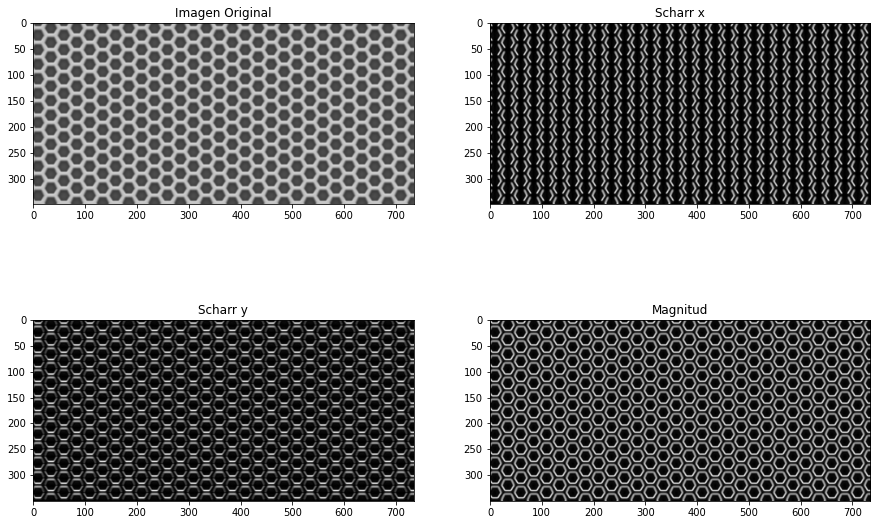

In [20]:
#Ploteado de imagenes
fig_i = plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
ax1.imshow(img_g_sua)
ax1.set_title('Imagen Original')

ax2 = plt.subplot(222)
ax2.imshow(scharrx_8u)
ax2.set_title('Scharr x')

ax3 = plt.subplot(223)
ax3.imshow(scharry_8u)
ax3.set_title('Scharr y')

ax4 = plt.subplot(224)
ax4.imshow(mag)
ax4.set_title('Magnitud')

plt.show()

## Gradiente Laplaciano

In [18]:
# Gradientes

# Aplicamos Laplaciano en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
lapla_32 = cv.Laplacian(img_g_sua,cv.CV_32F)
abs_lapla_32 = np.absolute(lapla_32)
#Convertimos a uint8
lapla_8u = np.uint8(abs_lapla_32)

Text(0.5, 1.0, 'Gradiente Laplaciano')

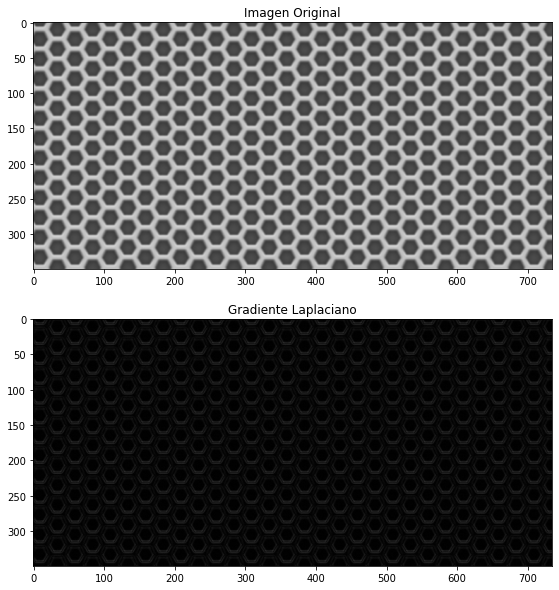

In [22]:
#Ploteado de imagenes
fig_i = plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
ax1.imshow(img_g_sua)
ax1.set_title('Imagen Original')

ax2 = plt.subplot(212)
ax2.imshow(lapla_8u)
ax2.set_title('Gradiente Laplaciano')

## Detector de bordes con Canny

Text(0.5, 1.0, 'Canny')

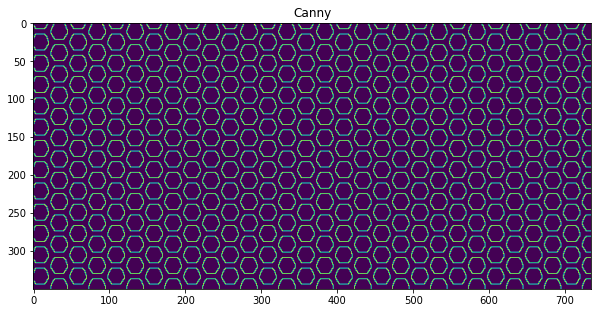

In [24]:
# Aplico Canny
#=============
edges = cv.Canny(img_g_sua,50,150,L2gradient=True)

# Muestro la imagen
#==================
plt.figure(figsize=(10,5))
plt.imshow(edges)
plt.title('Canny')